In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In [6]:
import csv 
data = pd.read_csv("loans.csv")

In [7]:
df = pd.DataFrame(data)
df.head()

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
annual_inc           9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


# EDA

In [110]:
df.groupby('not_fully_paid')['int.rate','pub.rec','delinq.2yrs',''].agg([np.mean,np.std])

int.rate           delinq.2yrs          
                    mean       std        mean       std
not_fully_paid                                          
0               0.120770  0.026692    0.161616  0.551483
1               0.132452  0.025495    0.175163  0.521014

In [33]:
df.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [10]:
df1 = df.interpolate()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
annual_inc           9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null float64
delinq.2yrs          9578 non-null float64
pub.rec              9578 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


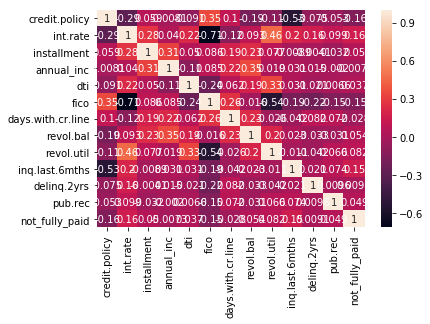

In [12]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

In [16]:
df_new = pd.get_dummies(df1,drop_first=True)
df_new.head()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg=LogisticRegression()


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,[1,2,3,5,6,7,8,9,10,11,13,14,15,16,17,18]],df_new['not_fully_paid'],test_size=0.3,random_state=1)

In [29]:
#predict on train data
log_reg.fit(X_train,y_train)
pred_train=log_reg.predict(X_train)
pd.crosstab(y_train,pred_train)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


col_0,0,1
not_fully_paid,,
0,5647,1
1,1055,1


In [49]:
Acc = (1.0+5647)/X_train.shape[0]
print(Acc*100)

84.24821002386635


In [51]:
Acc*100

84.24821002386635

In [54]:
#predict on test data

pred_test=log_reg.predict(X_test)
pd.crosstab(y_test,pred_test)

col_0,0,1
not_fully_paid,,
0,2396,1
1,476,1


In [55]:
Acc = (1.0+2396)/X_test.shape[0]
print(Acc*100)

83.40292275574113


In [56]:
X_test.shape[0]

2874

# probability prediction instead of the class

In [94]:
pred_train_prob=log_reg.predict_proba(X_train)

In [113]:
pred_train_prob1=log_reg.predict_proba(X_test)

In [95]:
pred_train_prob[:5] #this has the prob of both 0 and 1. we need only P(1)

array([[0.83228481, 0.16771519],
       [0.81845309, 0.18154691],
       [0.8296884 , 0.1703116 ],
       [0.7863007 , 0.2136993 ],
       [0.88836706, 0.11163294]])

In [96]:
pred_train_prob_only1=pred_train_prob[:,1]

In [97]:
pred_train_prob_only1

array([0.16771519, 0.18154691, 0.1703116 , ..., 0.19924262, 0.1875998 ,
       0.14764932])

In [98]:
final_yhat = []
for i in pred_train_prob_only1:
    if i>0.3:
        final_yhat.append(1)
    else:
        final_yhat.append(0)

In [99]:
pd.crosstab(y_train,np.array(final_yhat))


col_0,0,1
not_fully_paid,,
0,5605,43
1,1036,20


In [101]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant

In [103]:
X2=add_constant(X_train)

In [104]:
logit = sm.Logit(y_train,X2)


In [105]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.409163
         Iterations 7


In [107]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6687
Method:                           MLE   Df Model:                           16
Date:                Sat, 29 Dec 2018   Pseudo R-squ.:                 0.06054
Time:                        14:15:40   Log-Likelihood:                -2743.0
converged:                       True   LL-Null:                       -2919.8
                                        LLR p-value:                 1.894e-65
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.8212      1.348      4.319      0.000       3.180       8.463
int.rate                       0.8501      2.043      0.416      0.677      -3.154 

# ROC & AREA

In [111]:
from sklearn import metrics

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(-0.05, 1.05)

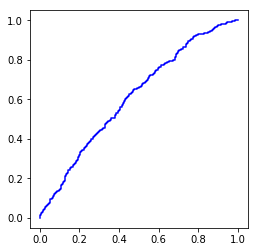

In [114]:
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_train_prob1[:,1])

plt.plot(fpr,tpr,label='ROC Curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [117]:
AUC = metrics.auc(fpr,tpr)
print(AUC)

0.611764006195725
